Segmentação de Imagens Coloridas
========

Questões
=======
Desenvolva um estudo sobre como realizar a segmentação de imagens coloridas utilizando diferentes modelos de representação de cor. Compare o processo utilizando o modelo RGB, HSI, e Lab. 

Quais as implicações para os algoritmos considerando os diferentes modelos de cor?

Considere, por exemplo, a técnica de fatiamento apresentada no capítulo 6 do livro e faça uma comparação com a segmentação de imagens em nível de cinza.

Faça o upload de um notebook python, ou envie o link para um notebook no collab.

Resolução
======

Importação das bibliotecas:

In [150]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Modelo de espaço de cores
========

Existem diversos modelos de representação de cores com objetivo específicos de aplicação. Nesse estudo, iremos ver **RGB** (*Red*, *Green* e *Blue*), **HSV** (*Hue*, *Saturation* e *Value*) e **LAB** (*Lightness*, A(Green $\leftrightarrow$ Red) e A(Blue $\leftrightarrow$ Yellow)).

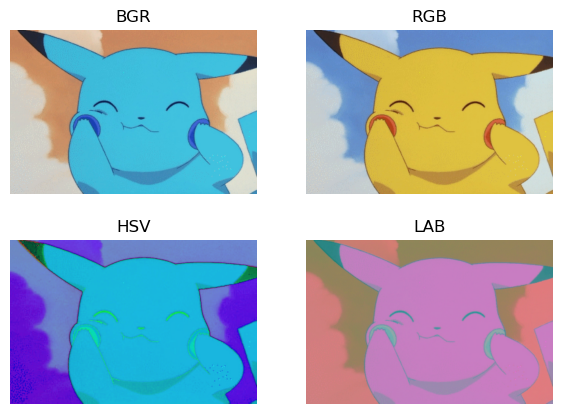

In [151]:
#Carregando a imagem que, por padrão, está no modelo BGR
img = cv.imread('pikachu.jpg')

#Convertendo a imagem em BGR para os modelos RGB, HSV e Lab
imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imgHSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)
imgLAB = cv.cvtColor(img, cv.COLOR_BGR2LAB)

#Exibição dos resultados
plt.figure(figsize=(7,5))
plt.subplot(221), plt.imshow(img), plt.title("BGR"), plt.axis('off')
plt.subplot(222), plt.imshow(imgRGB), plt.title("RGB"), plt.axis('off')
plt.subplot(223), plt.imshow(imgHSV), plt.title("HSV"), plt.axis('off')
plt.subplot(224), plt.imshow(imgLAB), plt.title("LAB"), plt.axis('off')
plt.show()

Segmentação por Cor
====

A segmentação por cor é feita determinando um **intervalo** que se deseja que realize uma máscara. Depois, é feita a operação **AND** do resultado isolando a cor desejada.

## RGB

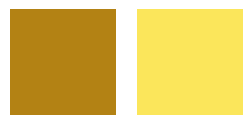

In [152]:
#Determinando o intervalo em RGB
lowcolor1 = (180,130,20)
highcolor1 = (251,230,91)

#Exibição do intervalo
plt.figure(figsize=(3,3))
plt.subplot(121), plt.imshow([[np.multiply(lowcolor1,1/255)]]), plt.axis('off')
plt.subplot(122), plt.imshow([[np.multiply(highcolor1,1/255)]]), plt.axis('off')
plt.show()

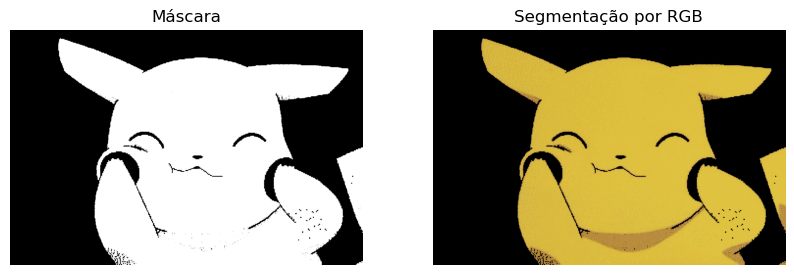

In [153]:
#Realizando a máscara de acordo com o intervalo determinado
mask = cv.inRange(imgRGB, lowcolor1, highcolor1)

#Aplica-se a operação AND entre a imagem original e a máscara, resultando no isolamento na cor desejada.
result = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

#Exibição dos resultados
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(mask,'gray'), plt.title("Máscara"), plt.axis('off')
plt.subplot(122), plt.imshow(result), plt.title("Segmentação por RGB"), plt.axis('off')
plt.show()

## HSV

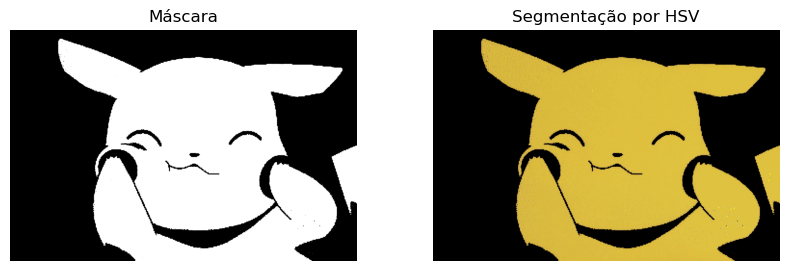

In [154]:
#Determinando o intervalo em HSV
lowcolor2 = (20, 100, 200) 
highcolor2 = (30, 255, 255) 

#Formando a máscara e aplicando AND sobre a imagem
mask2 = cv.inRange(imgHSV, lowcolor2, highcolor2)
result2 = cv.bitwise_and(imgRGB, imgRGB, mask=mask2)

#Exibição dos resultados
plt.figure(figsize=(10,3))
plt.subplot(121), plt.imshow(mask2,'gray'), plt.title("Máscara"), plt.axis('off')
plt.subplot(122), plt.imshow(result2), plt.title("Segmentação por HSV"), plt.axis('off')
plt.show()

## LAB

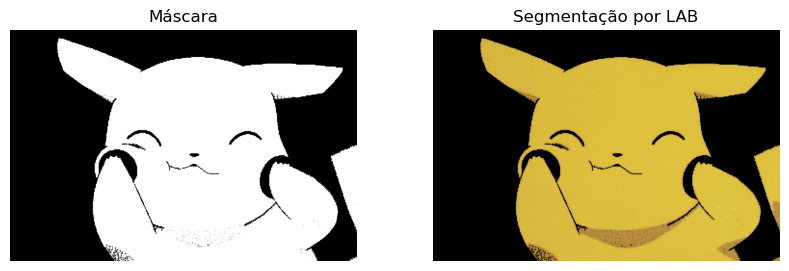

In [155]:
#Determinando o intervalo em LAB
lowcolor3 = (60*(255/100), -50+128, 30+128) 
highcolor3 = (100*(255/100), 20+128, 128+128) 

#Formando a máscara e aplicando AND sobre a imagem
mask3 = cv.inRange(imgLAB, lowcolor3, highcolor3)
result3 = cv.bitwise_and(imgRGB, imgRGB, mask=mask3)

#Exiição dos resultados
plt.figure(figsize=(10,3))
plt.subplot(121), plt.imshow(mask3,'gray'), plt.title("Máscara"), plt.axis('off')
plt.subplot(122), plt.imshow(result3), plt.title("Segmentação por LAB"), plt.axis('off')
plt.show()